## Loan Status Prediction Using ML

In this Project, we are creating a loan approval prediction system using Python  
✅ What is a loan prediction system?  
- A mechanism called the Loan Prediction System allows you to apply for loans and receive notifications when they are approved. By the data provided by the applicant, the system notifies the applicant of the loan's availability.

#### Algorithms  
- Decision Tree Classifier  
- Naive_Bayes Algorithm  
- Random Forest Classifier
- K-Neighbours
- Logistic Regression
- SVC (Support Vector Classifier)
- Gradient Boosting Classifier
#### HyperParameter Tunning
- Randomized Search CV
#### Steps followed
- Data Collection - Completeness and correctness of data collection
- Data preparation - cleansing and preparing data for the next steps of model development
- Algorithm Understanding - Knowledge of the algorithm used for model development
- Model Development - Building the model with the right selection of the parameters
- Model Tuning - Improving the model performance by tuning the hyper parameters
- Model Evaluation - Testing the model on sufficient sample for correctness


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('loan_prediction.csv')

In [6]:
# COLUMN DETAILS
# ================
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

### 1. Display Top 5 Rows of The Dataset

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [8]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [9]:
data.shape

(614, 13)

In [10]:
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  614
Number of Columns:  13


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [12]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Missing Percentage

data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 6. Handling The missing Values

In [14]:
# dropping Loan_ID column entirely

data = data.drop('Loan_ID', axis=1)

In [15]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [16]:
# making a list of columns with missing percentage < 5%

columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [17]:
# dropping rows and columns with missing percentage less than 5%

data = data.dropna(subset=columns) # as default axis=0 (meaning drop rows which contain missing values)

In [18]:
# checking missing percentage again

data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

- All columns, except **'Self_Employed'** and **'Credit_History'** are handled and these column's missing percentage is more than 5%, so we can't delete row them, we've to fill the missing values with appropriate values.


In [19]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
data['Self_Employed'].mode()[0]

'No'

In [22]:
data['Credit_History'].mode()[0]

np.float64(1.0)

In [23]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [24]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [25]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

- **All missing values are handled.**

### 7. Handling Categorical Columns

In [26]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
578,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
229,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y
297,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y


In [27]:
# replace 3+ with 3

data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='3')

In [28]:
data['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [29]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

#### Encoding

As machines only understand 0's and 1's. We've to convert our categorical columns to 0's and 1's.

In [30]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 8. Store Feature Matrix In X And Response (Target) In Vector y

In [32]:
X = data.drop('Loan_Status', axis=1)

In [33]:
y = data['Loan_Status']

### 9. Feature Scaling

In [34]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


- *Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property_Area* values are in the same range.
- Scaling the rest. If these are not scale, then Features with higher value range starts dominating in calculating distances b/w features.

- **Distance based Algorithms:**<br>
 1. K-nearest Neighbour <br>
 2. Neural Networking. <br>
 3. Support vector machine. <br>
 4. Linear Regression. <br>
 5. Logistic Regression. <br>

- ML algorithm which don't need feature scaling are **Non-linear algorithms**. like *Decision Tree, Random Forest, Gradient Bost, Naive Bayes*, etc.
- Any algorithm, which is not distance based is not affected by feature scaling. 

In [35]:
# making a list of columns that we need to scale

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [36]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

In [37]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,3,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### 10. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np


In [39]:
model_df = {}

def model_val(model,X,y):
    # spliting dataset for training and testing
    X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    
    # training the model
    model.fit(X_train, y_train)
    
    # asking model for prediction
    y_pred = model.predict(X_test)
    
    # checking model's prediction accuracy
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    # to find the best model we use cross-validation, thru this we can compare different algorithms
    # In this we use whole dataset to for testing not just 20%, but one at a time and summarize 
    # the result at the end.
    
    # 5-fold cross-validation (but 10-fold cross-validation is common in practise)
    score = cross_val_score(model,X,y,cv=5)  # it will divides the dataset into 5 parts and during each iteration 
                                             # uses (4,1) combination for training and testing 
    
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model] = round(np.mean(score)*100,2)
    

### 11. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# passing this model object of LogisticRegression Class in the function we've created
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [41]:
model_df

{LogisticRegression(): np.float64(80.48)}

### 12. SVC (Support Vector Classifier)

In [42]:
from sklearn import svm

model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.8018018018018018
SVC() Avg cross val score is 0.7938902538902539


In [43]:
model_df

{LogisticRegression(): np.float64(80.48), SVC(): np.float64(79.39)}

### 13. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7657657657657657
DecisionTreeClassifier() Avg cross val score is 0.7161670761670762


In [45]:
model_df

{LogisticRegression(): np.float64(80.48),
 SVC(): np.float64(79.39),
 DecisionTreeClassifier(): np.float64(71.62)}

### 14. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7657657657657657
RandomForestClassifier() Avg cross val score is 0.7921048321048321


In [47]:
model_df

{LogisticRegression(): np.float64(80.48),
 SVC(): np.float64(79.39),
 DecisionTreeClassifier(): np.float64(71.62),
 RandomForestClassifier(): np.float64(79.21)}

### 15. Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.774004914004914


In [49]:
model_df

{LogisticRegression(): np.float64(80.48),
 SVC(): np.float64(79.39),
 DecisionTreeClassifier(): np.float64(71.62),
 RandomForestClassifier(): np.float64(79.21),
 GradientBoostingClassifier(): np.float64(77.4)}

- Clearly, **LogisticRegression is the best model with accuracy 80.48.**
- ***But, we've trained our model with default parameters of Logistic Regression. Same with other algorithms as well.***

### 16. HyperParameter Tuning

In ML, there are two types of parameters:
   1. Model parameters
   2. Hyper parameters
    
**Model Parameters:** are parameters that model will learn during training phase. <br>
  For Example, y = mx + c. For Linear Regression, model will learn 'm' and 'c' during training phase.
so, **m** and **c** are called as **model parameters.**

**Hyper Parameters:** This are adjustable parameters that must by tuned in order to obtain a model with optimal performance.<br>
                  ML models can have many hyper parameters and finding best combination of parameters can be treated as **"Search Problem"**.
        
There are two best strategies for hyper parameter tuning.
1. **Grid Search CV** - go thru all the intermediate combination of parameters which make it computationally very expensive.
2. **Randomized Search CV** - it solve the drawbacks of GridSearchCV, as it goes thru only fixed no. of hyper parameter settings. it moves within a grid in random fashion to find best set of hyper parameter.

We'll we using Randomized Search CV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [51]:
# Let's tune hyper parameters of LogisticRegression (we've choosen 'C' and 'solver' parameter for tuning)

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

In [52]:
# In RandomizedSearchCV we've to pass estimator, which is nothing but Algo class, It will return
# a model with it's Hyper Parameter already set and we've to train that model, with our dataset

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                   param_distributions = log_reg_grid,
                   n_iter=20, cv=5, verbose=True)

In [53]:
# Let's train our model with these set hyper parameters for optimized results.

rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_reg.best_score_

np.float64(0.8047829647829647)

In [55]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

### SVC (Support Vector Classifier)

In [56]:
svc_grid = {'C':[0.25,0.50,0.75,1],
            "kernel":["linear"]}

In [57]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions = svc_grid,
                  cv=5,
                  n_iter=20,
                  verbose=True)

In [58]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\shaik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [59]:
rs_svc.best_score_

np.float64(0.8066011466011467)

- **Earlier it was 79.39. So there is some improvement.**

In [60]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

###  Random Forest Classifier

In [61]:
rf_grid = {'n_estimators':np.arange(10,1000,10),
           'max_features':['log2','sqrt'],
           'max_depth':[None,3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100],
           'min_samples_leaf':[1,2,5,10]
          }

In [62]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions = rf_grid,
                  cv=5,
                  n_iter=20,
                  verbose=True)

In [63]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [64]:
rs_rf.best_score_

np.float64(0.8066011466011467)

In [65]:
rs_rf.best_params_

{'n_estimators': np.int64(620),
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 3}

LogisticRegression score Before Hyperparameter Tuning: 80.48
LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 77.76
RandomForestClassifier score after Hyperparameter Tuning: 80.66 

> Selecting **Random Forest Classifier** for Production with **80.66** accuracy. Earlier it was Logistic Regression with 80.48.

### 17. Save The Model

**Before we save our best model RandomForestClassifier for Production, we've to train our Model on the entire dataset with best parameters that we've just found.**

In [67]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [68]:
rf = RandomForestClassifier(n_estimators = 270,
                            min_samples_split = 5,
                            min_samples_leaf = 5,
                            max_features = 'sqrt',
                            max_depth = 5)

In [69]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

#### Saving our model, so that we've don't have to train it again.

In [70]:
import joblib

In [71]:
# saving our model by passing an instance of our model and giving it a name.

joblib.dump(rf,'loan_status_predictor_model')

['loan_status_predictor_model']

In [72]:
# In Future, we can perform predictin using this saved model, as shown below

model = joblib.load('loan_status_predictor_model')

In [73]:
import pandas as pd

df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [74]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [75]:
result = model.predict(df)

In [76]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI

In [3]:
from tkinter import *
import joblib
import pandas as pd

In [6]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predictor_model')
    
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master = Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education[1:Graduate, 0:Not Graduate]").grid(row=4)
Label(master,text = "Self_Employed[1:Yes, 0:NO]").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict", command=show_entry).grid()

mainloop()

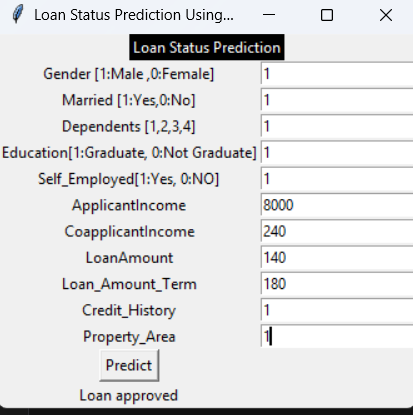